In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Social_Network_Ads.csv')

print("First five rows of dataset:")
display(data.head())

X = data.iloc[:, [2, 3]].values   # Selecting 'Age' and 'EstimatedSalary'
y = data.iloc[:, -1].values       # Selecting 'Purchased' column


First five rows of dataset:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")


Training samples: 300, Test samples: 100


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
#Train a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)


,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
#Make predictions
y_pred = knn_model.predict(X_test)

#Evaluate performance
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Confusion Matrix:
 [[58  5]
 [ 2 35]]
Model Accuracy: 93.00%


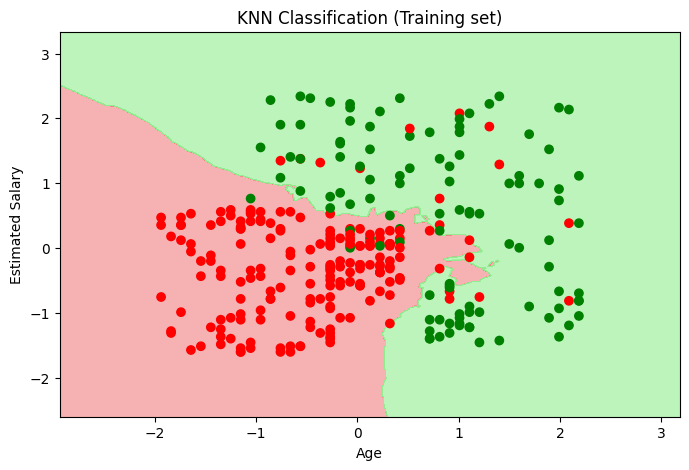

In [6]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8,5))
plt.contourf(
    X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.6, cmap=ListedColormap(('lightcoral', 'lightgreen'))
)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
plt.title('KNN Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
